The basis of this project is to measure a real world phenomenon across one hundred data points with four different variables, using a synthesised data set.

Recently my workplace offered all employees access to vaccination for the flu and I decided to try model my project on this concept.  My interest in this stems from my working in a healthcare setting (though not as a health care practitioner) and I'm intrigued by epidemiological data.

My project is based on the concept of 100 staff members who avail of the vaccine and the representative variables are - 
* Their age
* The department they work in
* Their gender
* If they had the vaccine the previous year

If I was to perform this analysis on actual data, rather than synthesised, I would carry out a survey of vaccinated staff and collate their responses to inform the results.  

The first step I took was to randomly generate a set of 100 integers to represent the 100 vaccinated staff members and another set of 100 randomly generated integers in a range from 18 to 65 to represent the ages of these staff numbers. I then used a scatterplot to display the spread of the age variable across the simulated data on vaccinated staff members. 

Text(0,0.5,'Age')

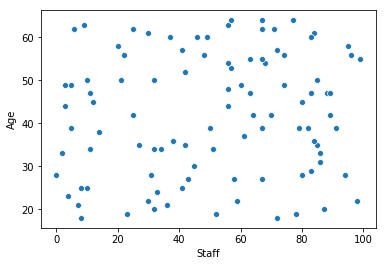

In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
 
np.random.seed(170380)#fixing seed for reproducibility
staff = np.random.choice(101, 100) #generates an array of 100 numbers between 1 and 100
staff_ages = np.random.randint(18, 65, 100)#generates an array of 100 numbers in a range from 18 to 65
sns.scatterplot(staff,staff_ages)
plt.xlabel("Staff")
plt.ylabel("Age")

In order to describe the shape of the distribution of staff ages in a clearer way, I decided to also plot this as a histogram -

Text(0,0.5,'Frequency')

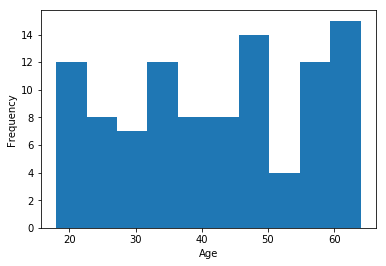

In [2]:
plt.hist(staff_ages)
plt.xlabel("Age")
plt.ylabel("Frequency")

The histogram above describes the distribution of the data as continuous normal. To derive the mean age of the data set I used the [numpy.mean](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.mean.html) function - 

In [3]:
np.mean(staff_ages, dtype=np.integer)#to print mean as integer rather than float 

42

Next I decided I needed to randomly assign these 100 vaccinated staff members to 4 different departments. I figured the best way to do this was to create a Pandas Dataframe and then generate the random values within that. After some online research I found [this post on stackoverflow.com](https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python) that recommended using the multinomial distribution from the [numpy.random.multinomial function](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multinomial.html) from NumPy's Random Sampling package. 

In [4]:
department = (["Accounts", "Engineering", "Administration", "Facilities"])
np.random.seed(170380)
#need to assign 25 variables from "staff" to the 4 departments and create a dataframe of these values
df = pd.DataFrame(np.random.multinomial(100,[4/25.]*4, size=1)) #https://stackoverflow.com/questions/3589214/generate-multiple-random-numbers-to-equal-a-value-in-python
df.columns = (["Accounts", "Engineering", "Administration", "Facilities"])
df.index = (["Total"])
print (df)

       Accounts  Engineering  Administration  Facilities
Total        16           19              16          49


To display the uptake of the vaccine, I used a barplot to chart the observations of vaccinated staff per department - 

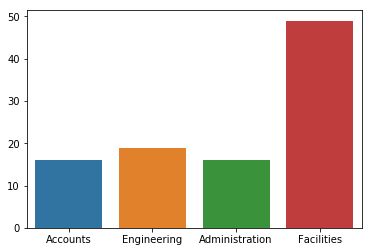

In [5]:
#vaccine uptake
sns.barplot(data=df)

I then wanted to align the age variable with the department variable and see if I could determine the mean age per department.  To do this, it was necessary to assign an age value for each data point representing the distribution across the four departments.  To begin with, I reused the department variable I already created and then used NumPy's random.choice function to populate from a range of 100:

In [6]:
#staff_ages vs department
np.random.seed(170380)
departmental_allocation = [np.random.choice(department) for i in range(100)]

In [7]:
gender = ["male", "female"]
np.random.seed(170380)
gender_selection = [np.random.choice(gender) for p in range (100)]
vaccine = ["yes", "no"]
previous_vaccine = [np.random.choice(vaccine) for q in range (100)]

In [34]:
df1 = pd.Series(staff_ages, departmental_allocation, gender_selection, previous_vaccine)
df1

TypeError: data type not understood